### Importing required libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

### Data Overview:

In [4]:
# Loading the dataset and understanding it
df=pd.read_excel(r"C:\Users\bagya\Downloads\E Commerce Dataset.xlsx",sheet_name='E Comm')
df.head(5)

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                  2        Single                9   
1              Mobile                  3        Single                7   
2              Mobile                  3        Single                6   
3  Laptop & Accessory                  5        Single                8   
4              Mobile                  5        Single                3   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   
4         0                         11.0         1.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0          159.93  
1                0.0          120.90  
2                3.0          120.28  
3                3.0          134.07  
4                3.0          129.60

In [5]:
df.shape

(5630, 20)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [7]:
df.nunique()

CustomerID                     5630
Churn                             2
Tenure                           36
PreferredLoginDevice              3
CityTier                          3
WarehouseToHome                  34
PreferredPaymentMode              7
Gender                            2
HourSpendOnApp                    6
NumberOfDeviceRegistered          6
PreferedOrderCat                  6
SatisfactionScore                 5
MaritalStatus                     3
NumberOfAddress                  15
Complain                          2
OrderAmountHikeFromlastYear      16
CouponUsed                       17
OrderCount                       16
DaySinceLastOrder                22
CashbackAmount                 2586
dtype: int64

In [8]:
columns=df.columns.to_list()
columns

['CustomerID',
 'Churn',
 'Tenure',
 'PreferredLoginDevice',
 'CityTier',
 'WarehouseToHome',
 'PreferredPaymentMode',
 'Gender',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'PreferedOrderCat',
 'SatisfactionScore',
 'MaritalStatus',
 'NumberOfAddress',
 'Complain',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount']

In [9]:
# Numerical columns:
df.select_dtypes(include=np.number).columns

Index(['CustomerID', 'Churn', 'Tenure', 'CityTier', 'WarehouseToHome',
       'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore',
       'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear',
       'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [10]:
df.select_dtypes(include=np.number).describe().T

count          mean          std      min  \
CustomerID                   5630.0  52815.500000  1625.385339  50001.0   
Churn                        5630.0      0.168384     0.374240      0.0   
Tenure                       5366.0     10.189899     8.557241      0.0   
CityTier                     5630.0      1.654707     0.915389      1.0   
WarehouseToHome              5379.0     15.639896     8.531475      5.0   
HourSpendOnApp               5375.0      2.931535     0.721926      0.0   
NumberOfDeviceRegistered     5630.0      3.688988     1.023999      1.0   
SatisfactionScore            5630.0      3.066785     1.380194      1.0   
NumberOfAddress              5630.0      4.214032     2.583586      1.0   
Complain                     5630.0      0.284902     0.451408      0.0   
OrderAmountHikeFromlastYear  5365.0     15.707922     3.675485     11.0   
CouponUsed                   5374.0      1.751023     1.894621      0.0   
OrderCount                   5372.0      3.008004     2.939680      1.0   
DaySinceLastOrder            5323.0      4.543491     3.654433      0.0   
CashbackAmount               5630.0    177.223030    49.207036      0.0   

                                  25%       50%         75%       max  
CustomerID                   51408.25  52815.50  54222.7500  55630.00  
Churn                            0.00      0.00      0.0000      1.00  
Tenure                           2.00      9.00     16.0000     61.00  
CityTier                         1.00      1.00      3.0000      3.00  
WarehouseToHome                  9.00     14.00     20.0000    127.00  
HourSpendOnApp                   2.00      3.00      3.0000      5.00  
NumberOfDeviceRegistered         3.00      4.00      4.0000      6.00  
SatisfactionScore                2.00      3.00      4.0000      5.00  
NumberOfAddress                  2.00      3.00      6.0000     22.00  
Complain                         0.00      0.00      1.0000      1.00  
OrderAmountHikeFromlastYear     13.00     15.00     18.0000     26.00  
CouponUsed                       1.00      1.00      2.0000     16.00  
OrderCount                       1.00      2.00      3.0000     16.00  
DaySinceLastOrder                2.00      3.00      7.0000     46.00  
CashbackAmount                 145.77    163.28    196.3925    324.99

In [11]:
# Showing the unique values in ach column:
for col in df.columns:
    if df[col].dtype==float or df[col].dtype==int:
        print(str(col)+ ":" + str(df[col].unique()))
        print(df[col].value_counts())
        print("---------------------------------------------------------------------------")

Tenure:[ 4. nan  0. 13. 11.  9. 19. 20. 14.  8. 18.  5.  2. 30.  1. 23.  3. 29.
  6. 26. 28.  7. 24. 25. 10. 15. 22. 27. 16. 12. 21. 17. 50. 60. 31. 51.
 61.]
Tenure
1.0     690
0.0     508
8.0     263
9.0     247
7.0     221
10.0    213
5.0     204
4.0     203
3.0     195
11.0    194
6.0     183
12.0    182
13.0    181
14.0    176
2.0     167
15.0    159
16.0    149
19.0    140
18.0    123
20.0    109
17.0    106
23.0     89
21.0     84
22.0     76
24.0     75
28.0     70
30.0     66
27.0     66
26.0     60
25.0     59
29.0     55
31.0     49
50.0      1
60.0      1
51.0      1
61.0      1
Name: count, dtype: int64
---------------------------------------------------------------------------
WarehouseToHome:[  6.   8.  30.  15.  12.  22.  11.   9.  31.  18.  13.  20.  29.  28.
  26.  14.  nan  10.  27.  17.  23.  33.  19.  35.  24.  16.  25.  32.
  34.   5.  21. 126.   7.  36. 127.]
WarehouseToHome
9.0      559
8.0      444
7.0      389
16.0     322
14.0     299
6.0      295
15.0     28

In [12]:
# Categorical columns:
df.select_dtypes(exclude=np.number).columns

Index(['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
       'PreferedOrderCat', 'MaritalStatus'],
      dtype='object')

In [13]:
df.select_dtypes(exclude=np.number).describe()

PreferredLoginDevice PreferredPaymentMode Gender    PreferedOrderCat  \
count                  5630                 5630   5630                5630   
unique                    3                    7      2                   6   
top            Mobile Phone           Debit Card   Male  Laptop & Accessory   
freq                   2765                 2314   3384                2050   

       MaritalStatus  
count           5630  
unique             3  
top          Married  
freq            2986

In [14]:
# Showing the unique values in ach column:
for col in df.columns:
    if df[col].dtype==object:
        print(str(col)+ ":" + str(df[col].unique()))
        print(df[col].value_counts())
        print("---------------------------------------------------------------------------")

PreferredLoginDevice:['Mobile Phone' 'Phone' 'Computer']
PreferredLoginDevice
Mobile Phone    2765
Computer        1634
Phone           1231
Name: count, dtype: int64
---------------------------------------------------------------------------
PreferredPaymentMode:['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']
PreferredPaymentMode
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: count, dtype: int64
---------------------------------------------------------------------------
Gender:['Female' 'Male']
Gender
Male      3384
Female    2246
Name: count, dtype: int64
---------------------------------------------------------------------------
PreferedOrderCat:['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']
PreferedOrderCat
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile 

In [15]:
# As mobile phone and phone are both same so we can merge them

df["PreferredLoginDevice"].value_counts()

PreferredLoginDevice
Mobile Phone    2765
Computer        1634
Phone           1231
Name: count, dtype: int64

In [16]:
df.loc[df["PreferredLoginDevice"]=="Phone","PreferredLoginDevice"]="Mobile Phone"

In [17]:
df["PreferredLoginDevice"].value_counts()

PreferredLoginDevice
Mobile Phone    3996
Computer        1634
Name: count, dtype: int64

In [18]:
# As mobile phone and phone are both same so we can merge them

df["PreferedOrderCat"].value_counts()

PreferedOrderCat
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: count, dtype: int64

In [19]:
df.loc[df['PreferedOrderCat'] == 'Mobile', 'PreferedOrderCat' ] = 'Mobile Phone'

In [20]:
df["PreferedOrderCat"].value_counts()

PreferedOrderCat
Mobile Phone          2080
Laptop & Accessory    2050
Fashion                826
Grocery                410
Others                 264
Name: count, dtype: int64

In [21]:
# As COD and Cash on Delivery are both the same we can merge them
# And also Both Credit Card and CC are same we can merge them
df["PreferredPaymentMode"].value_counts()

PreferredPaymentMode
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: count, dtype: int64

In [22]:
df.loc[df["PreferredPaymentMode"]=="COD","PreferredPaymentMode"]="Cash on Delivery"
df.loc[df["PreferredPaymentMode"]=="CC","PreferredPaymentMode"]="Credit Card"

In [23]:
df["PreferredPaymentMode"].value_counts()

PreferredPaymentMode
Debit Card          2314
Credit Card         1774
E wallet             614
Cash on Delivery     514
UPI                  414
Name: count, dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [25]:
# convert num_cols to categories
df1=df.copy()

In [26]:
for col in df1.columns:
    if col=="CustomerID":
        continue
    
    else:
        if df1[col].dtype=="int64":
            df1[col]=df[col].astype(str)
df1.dtypes        

CustomerID                       int64
Churn                           object
Tenure                         float64
PreferredLoginDevice            object
CityTier                        object
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered        object
PreferedOrderCat                object
SatisfactionScore               object
MaritalStatus                   object
NumberOfAddress                 object
Complain                        object
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

## Statistical Analysis after converting the datatypes:

In [27]:
# For Numrical datatypes:
df1.describe(include=np.number).T

count          mean          std      min  \
CustomerID                   5630.0  52815.500000  1625.385339  50001.0   
Tenure                       5366.0     10.189899     8.557241      0.0   
WarehouseToHome              5379.0     15.639896     8.531475      5.0   
HourSpendOnApp               5375.0      2.931535     0.721926      0.0   
OrderAmountHikeFromlastYear  5365.0     15.707922     3.675485     11.0   
CouponUsed                   5374.0      1.751023     1.894621      0.0   
OrderCount                   5372.0      3.008004     2.939680      1.0   
DaySinceLastOrder            5323.0      4.543491     3.654433      0.0   
CashbackAmount               5630.0    177.223030    49.207036      0.0   

                                  25%       50%         75%       max  
CustomerID                   51408.25  52815.50  54222.7500  55630.00  
Tenure                           2.00      9.00     16.0000     61.00  
WarehouseToHome                  9.00     14.00     20.0000    127.00  
HourSpendOnApp                   2.00      3.00      3.0000      5.00  
OrderAmountHikeFromlastYear     13.00     15.00     18.0000     26.00  
CouponUsed                       1.00      1.00      2.0000     16.00  
OrderCount                       1.00      2.00      3.0000     16.00  
DaySinceLastOrder                2.00      3.00      7.0000     46.00  
CashbackAmount                 145.77    163.28    196.3925    324.99

In [28]:
# For categorical datatypes:
df1.describe(exclude=np.number).T

count unique           top  freq
Churn                     5630      2             0  4682
PreferredLoginDevice      5630      2  Mobile Phone  3996
CityTier                  5630      3             1  3666
PreferredPaymentMode      5630      5    Debit Card  2314
Gender                    5630      2          Male  3384
NumberOfDeviceRegistered  5630      6             4  2377
PreferedOrderCat          5630      5  Mobile Phone  2080
SatisfactionScore         5630      5             3  1698
MaritalStatus             5630      3       Married  2986
NumberOfAddress           5630     15             2  1369
Complain                  5630      2             0  4026

In [29]:
# Checking for duplicated values:
df1.duplicated().sum()

0

In [30]:
# Checking for null values:
grouped_data=[]
for col in columns:
    n_missing=df[col].isnull().sum()
    percentage=n_missing/len(df) * 100
    grouped_data.append([col,n_missing,percentage])

# Putting them into a new dataframe
grouped_df = pd.DataFrame(grouped_data, columns=['column', 'n_missing', 'percentage'])

# Grouping their size under each column
#missing_values = grouped_df.groupby(['column', 'n_missing', 'percentage']).size()
missing_values

column                       n_missing  percentage
CashbackAmount               0          0.000000      1
Churn                        0          0.000000      1
CityTier                     0          0.000000      1
Complain                     0          0.000000      1
CouponUsed                   256        4.547069      1
CustomerID                   0          0.000000      1
DaySinceLastOrder            307        5.452931      1
Gender                       0          0.000000      1
HourSpendOnApp               255        4.529307      1
MaritalStatus                0          0.000000      1
NumberOfAddress              0          0.000000      1
NumberOfDeviceRegistered     0          0.000000      1
OrderAmountHikeFromlastYear  265        4.706927      1
OrderCount                   258        4.582593      1
PreferedOrderCat             0          0.000000      1
PreferredLoginDevice         0          0.000000      1
PreferredPaymentMode         0          0.000000     

In [ ]:
#from pandas_profiling import ProfileReport
#ProfileReport(df1)

In [31]:
df1.select_dtypes(include=np.number).columns

Index(['CustomerID', 'Tenure', 'WarehouseToHome', 'HourSpendOnApp',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

# Exploratory Data Analysis:

In [32]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [33]:
binary_cat_cols=["Complain"]
outcome=["Churn"]
cat_cols=['PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode',
       'Gender', 'NumberOfDeviceRegistered', 'PreferedOrderCat',
       'SatisfactionScore', 'MaritalStatus', 'NumberOfAddress', 'Complain']
num_cols=['Tenure', 'WarehouseToHome', 'HourSpendOnApp',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount']

## Numerical Columns:

In [34]:
df_c = df[df['Churn']==1].copy()
df_nc = df[df['Churn']==0].copy()

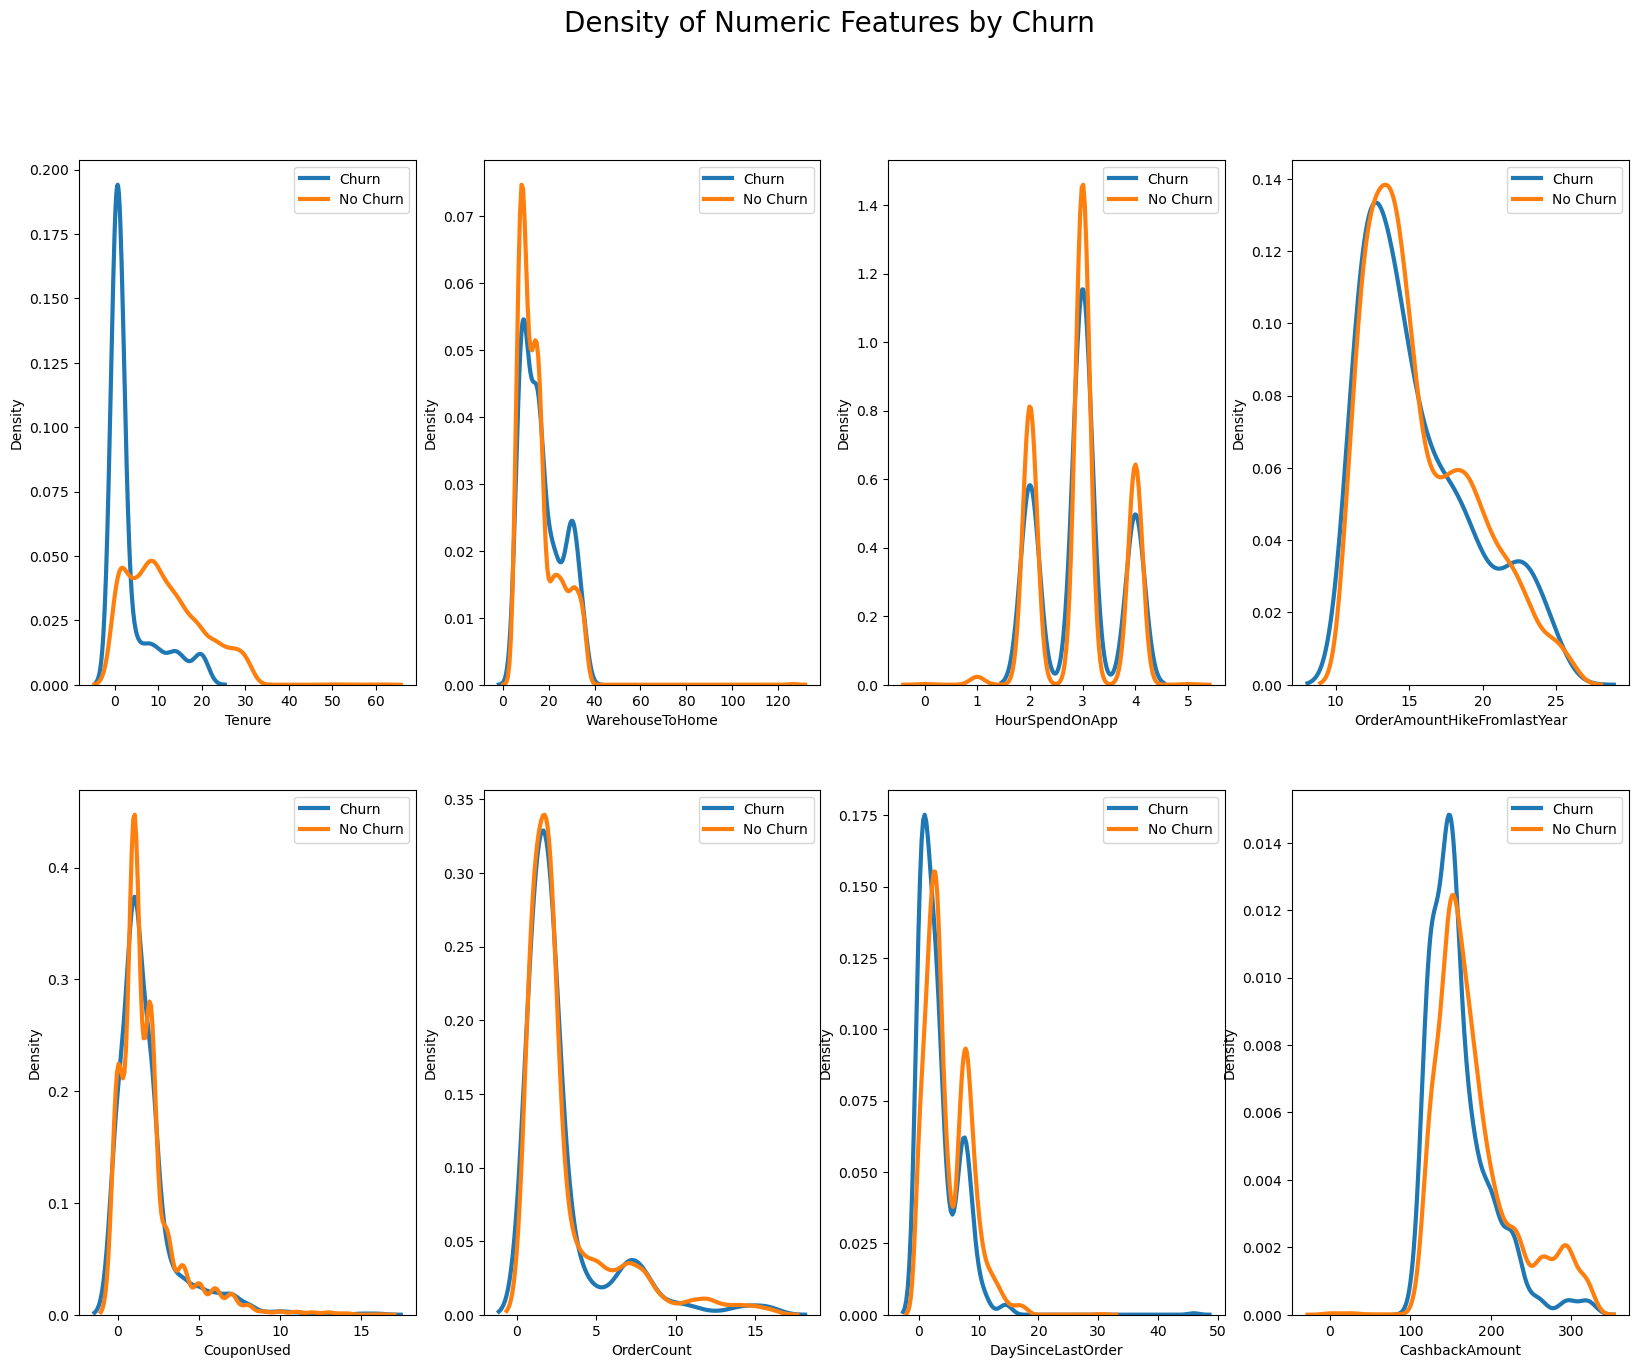

In [35]:
fig, ax = plt.subplots(2,4,figsize=(20, 15))
fig.suptitle('Density of Numeric Features by Churn', fontsize=20)
ax = ax.flatten()
 
for idx,c in enumerate(num_cols):
    sns.kdeplot(df_c[c], linewidth= 3,
             label = 'Churn',ax=ax[idx])
    sns.kdeplot(df_nc[c], linewidth= 3,
             label = 'No Churn',ax=ax[idx])

    ax[idx].legend(loc='upper right')

plt.show()

### Inference:

* Customers with longer tenure seem less likely to churn. Makes sense as longer tenure indicates satisfaction.
* Churn rate looks similar across tiers. City tier does not seem predictive of churn.
* Higher satisfaction scores strongly associate with lower churn, as expected. 
* Coupon usage correlates with lower churn. Coupons enhance loyalty.

### Categorical Columns:

In [36]:
df_c = df1[df1['Churn']=='1'].copy()
df_nc = df1[df1['Churn']=='0'].copy()

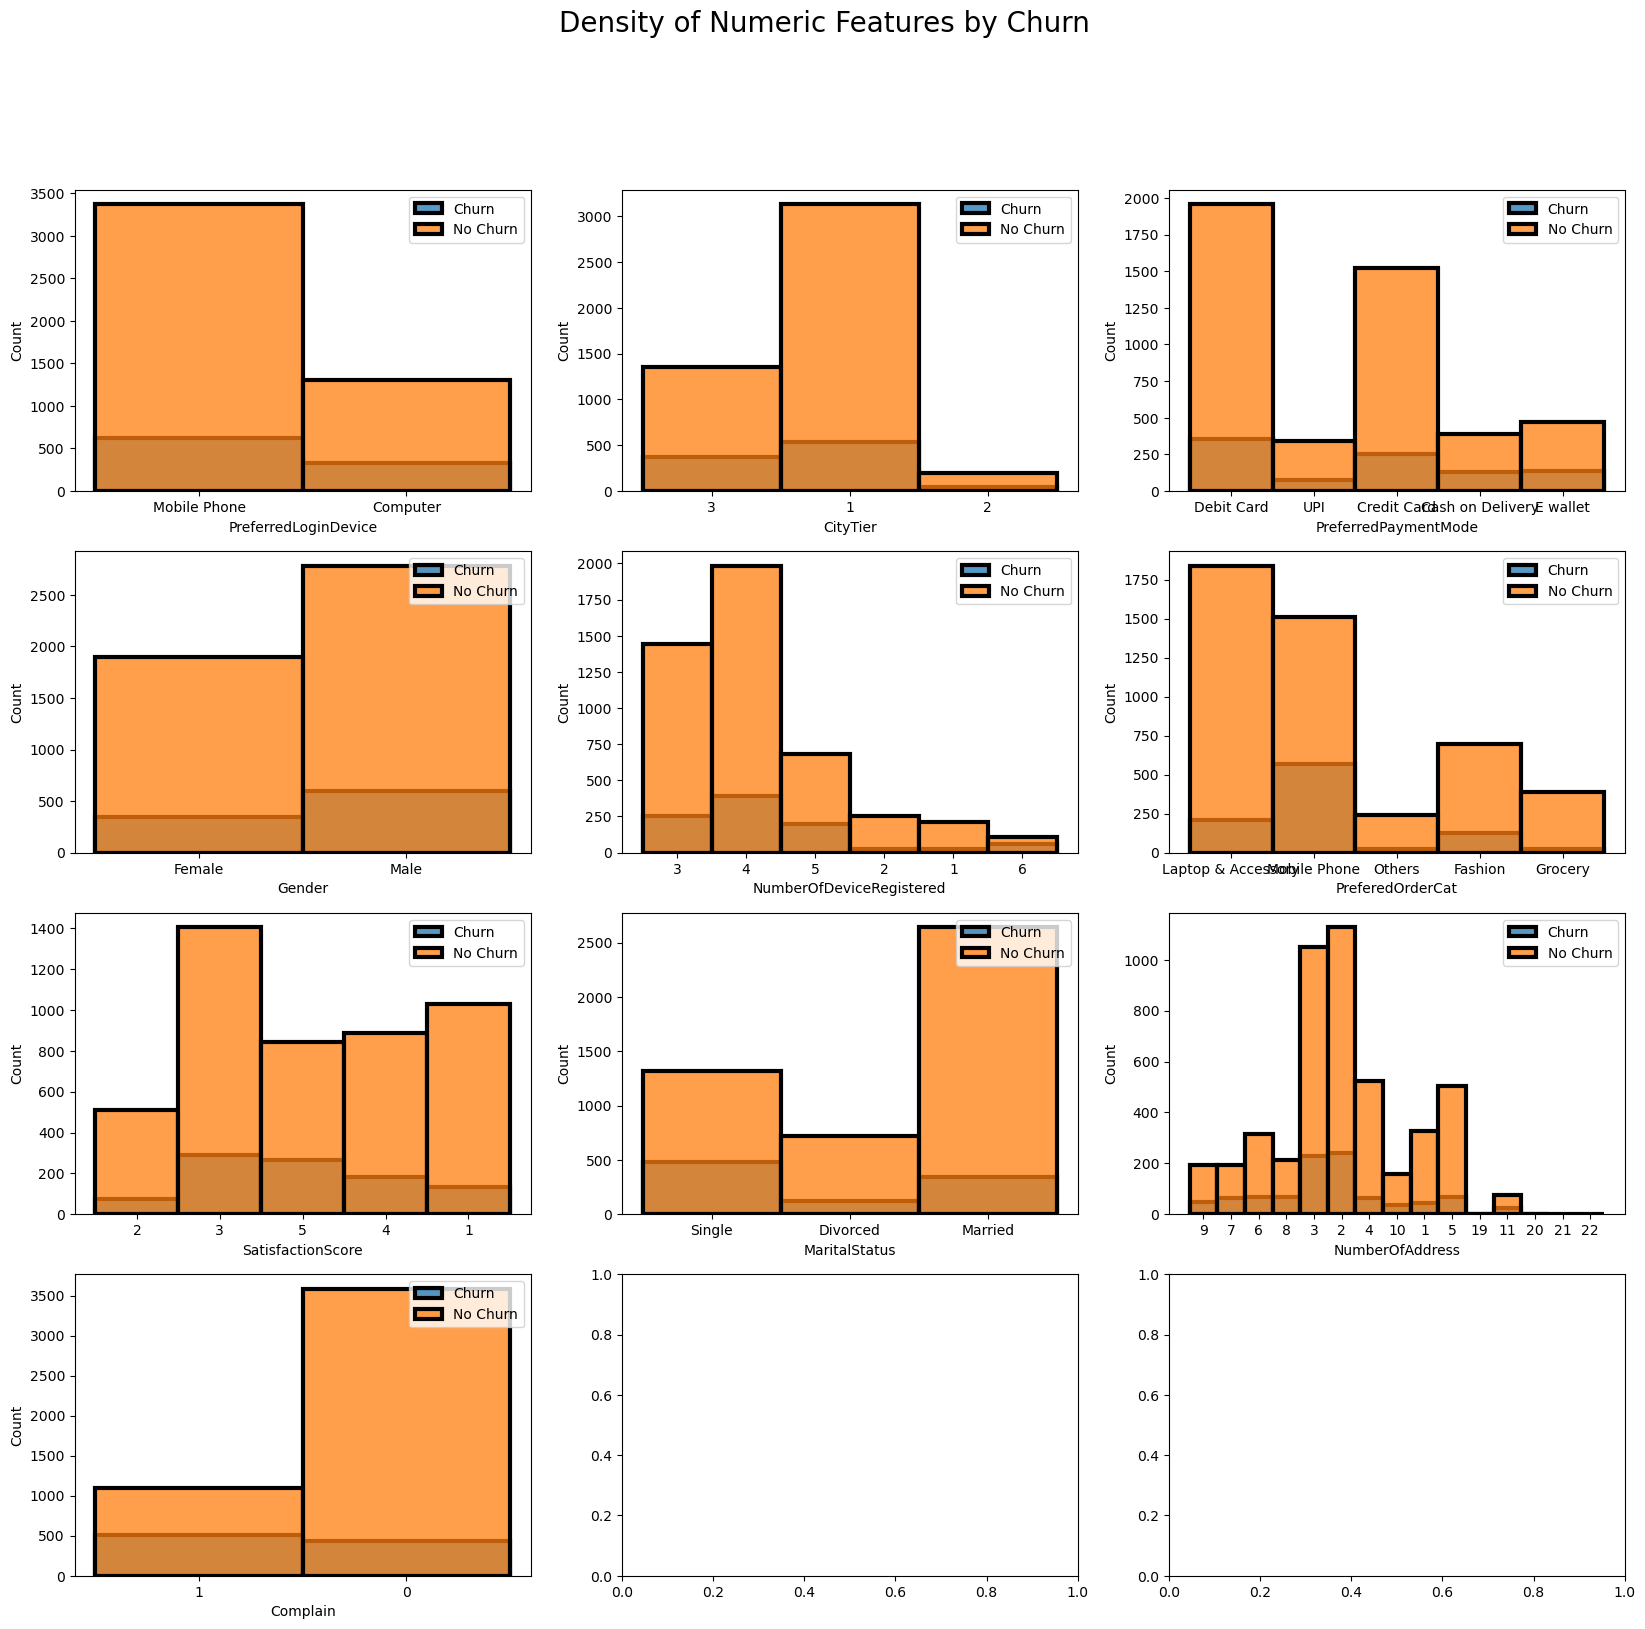

In [37]:
fig, ax = plt.subplots(4,3,figsize=(20, 18))
fig.suptitle('Density of Numeric Features by Churn', fontsize=20)
ax = ax.flatten()

for idx,c in enumerate(cat_cols):
    sns.histplot(df_c[c], linewidth= 3,
             label = 'Churn',ax=ax[idx])
    sns.histplot(df_nc[c], linewidth= 3,
             label = 'No Churn',ax=ax[idx])

    ax[idx].legend(loc='upper right')

plt.show()

In [38]:
## Importing some other color pallettes:
pie_palette = ['#3E885B','#7694B6','#85BDA6', '#80AEBD', '#2F4B26', '#3A506B']
green_palette = ['#2F4B26', '#3E885B', '#85BDA6', '#BEDCFE', '#C0D7BB']
blue_palette = ['#3A506B', '#7694B6', '#80AEBD', '#5BC0BE', '#3E92CC']
custom_palette = ['#3A506B', '#7694B6', '#80AEBD', '#3E885B', '#85BDA6']
red_palette = ['#410B1 3', '#CD5D67', '#BA1F33', '#421820', '#91171F']





What is the distance between warehouse to customer house in different city tier?

Does different CityTiers has different prefered products?

What is the preferred payment mode for different CityTiers?

Which CityTier has the highest OrderCount?

Does the percentage increase in order amount from last year affect churn rate?

What is the relation between Complain and DaySinceLastOrder?

What is ordercount for customers with high HourSpendOnApp?

Is there a relationship between preferred order category and churn rate?

Do customers who used more coupons have lower churn rates?

Is there a connection between satisfaction score and number of orders in the past month?

There is relation between CashbackAmount and order counts within churn?

Are customers who complained more likely to churn?

### 1.Is there a relationship between Gender and Churn? & Which Gender has more Orders?

In [39]:
df["Gender"].value_counts()

Gender
Male      3384
Female    2246
Name: count, dtype: int64

In [40]:
df["Churn"].value_counts()

Churn
0    4682
1     948
Name: count, dtype: int64

In [41]:
df.groupby(by="Churn")["Gender"].value_counts()

Churn  Gender
0      Male      2784
       Female    1898
1      Male       600
       Female     348
Name: count, dtype: int64

In [42]:
df.groupby(by="PreferredLoginDevice")["OrderCount"].value_counts()

PreferredLoginDevice  OrderCount
Computer              2.0            573
                      1.0            486
                      3.0            132
                      4.0             61
                      7.0             59
                      5.0             48
                      8.0             44
                      6.0             40
                      14.0            20
                      9.0             19
                      11.0            16
                      10.0            15
                      12.0            15
                      13.0             9
                      15.0             8
                      16.0             4
Mobile Phone          2.0           1452
                      1.0           1265
                      3.0            239
                      7.0            147
                      4.0            143
                      5.0            133
                      8.0            128
                      6.

<Axes: xlabel='Gender'>

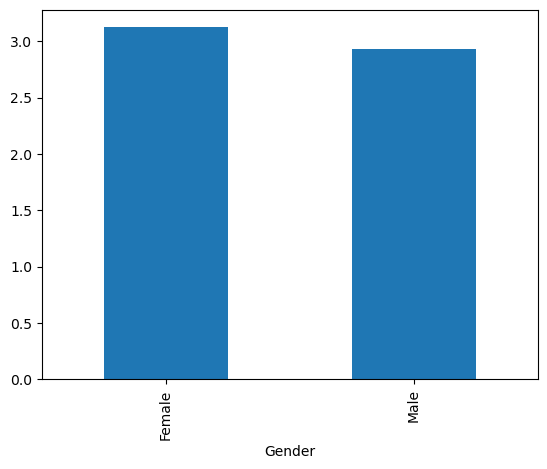

In [43]:
gender_orders=df.groupby(by="Gender")["OrderCount"].mean().plot(kind="bar")
gender_orders

* There is not a big difference between the males and females.

In [44]:
percentage_Males =600/3384 * 100

percentage_Males   #the percentage of the leaving males out of the males 

17.73049645390071

In [45]:
percentage_Females =348/2246 * 100

percentage_Females  #the percentage of the leaving females out of the females

15.49421193232413

In [46]:
import plotly.express as px

In [47]:
fig=px.pie(df,values="Churn",names="Gender")
fig.show()

## Inference:
As we see the males are more likely to churn as we have 63.3 % churned males from the app may be the company should consider incresing the products that grap the males interest and so on.. we are going to see if there is another factors that makes the highest segment of churned customers are males.

### 2-Which MartialStatus has the highest Churn rate?

In [48]:
df.groupby("Churn")["MaritalStatus"].value_counts()

Churn  MaritalStatus
0      Married          2642
       Single           1316
       Divorced          724
1      Single            480
       Married           344
       Divorced          124
Name: count, dtype: int64

Text(0, 0.5, 'Churn Rate')

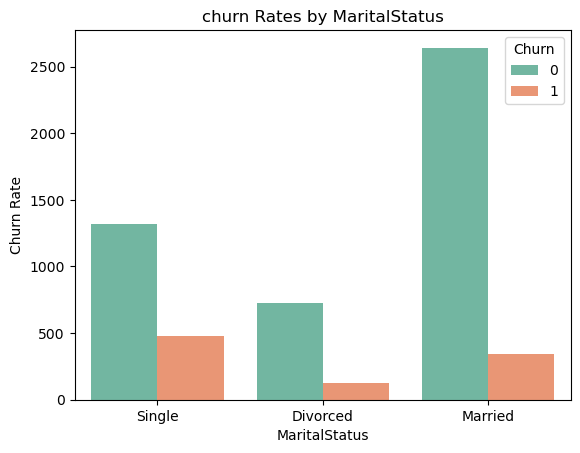

In [49]:
sns.countplot(x='MaritalStatus',hue='Churn',data=df,palette='Set2')
plt.title("churn Rates by MaritalStatus")
plt.ylabel("Churn Rate")

## Inference:
The married are the highest customer segment in the comapny may be the comapny should consider taking care of the products that suits the single and the married customers as the singles are the most likely to churn from the app

### 3-Which CityTier has higher Tenure and OrderCount?

In [50]:
df_grouped_tenure = df.groupby('CityTier')['Tenure'].agg(['mean', 'max'])
df_grouped_tenure

mean   max
CityTier                 
1         10.528818  51.0
2         11.169725  31.0
3          9.361740  61.0

In [51]:
df_grouped_OrderCount = df.groupby('CityTier')['OrderCount'].agg(['mean', 'max'])
df_grouped_OrderCount

mean   max
CityTier                
1         2.953255  16.0
2         2.584034  13.0
3         3.185185  16.0

In [52]:
df.groupby("CityTier")["OrderCount"].mean()

CityTier
1    2.953255
2    2.584034
3    3.185185
Name: OrderCount, dtype: float64

## Inference:
Citytier 3 has the highest order avg but it not to be a strong factor in the customer churning

### 4-Is Customer with High SatisfactionScore have high HourSpendOnApp?

#### Is there a correlation between SatisfactionScore and HourSpendOnApp?

In [53]:
df["SatisfactionScore"].dtype

dtype('int64')

<Axes: xlabel='SatisfactionScore', ylabel='HourSpendOnApp'>

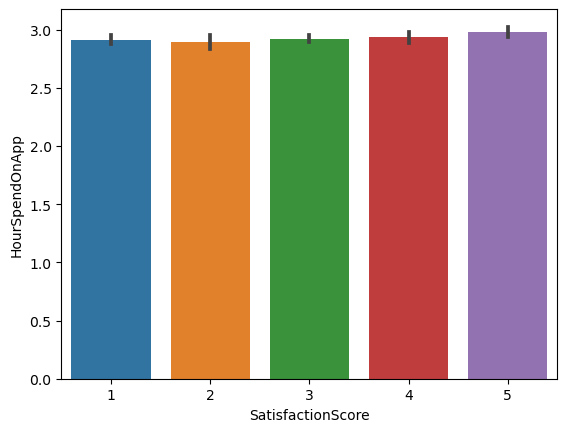

In [54]:
sns.barplot(data=df,x="SatisfactionScore",y="HourSpendOnApp")

* From the plot I do not think there is any realation between the satisfaction score and people's spent time on the app

### 5.Which CityTier has the most HourSpendOnApp?

<Axes: xlabel='CityTier', ylabel='Count'>

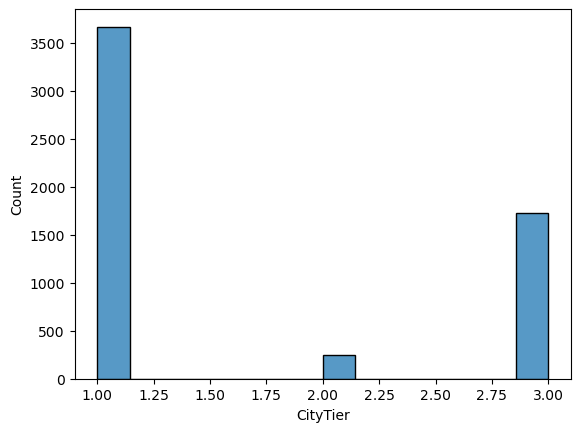

In [55]:
sns.histplot(data=df,x="CityTier")

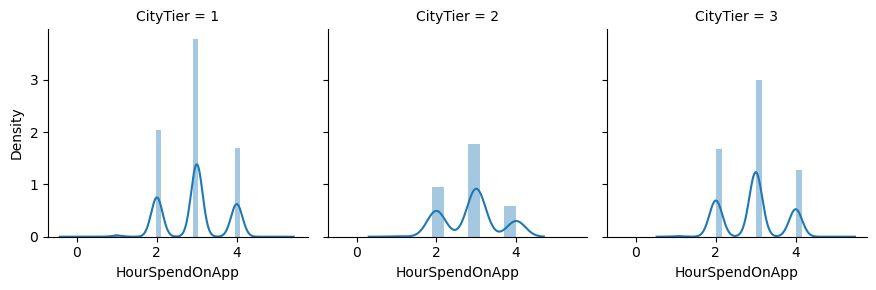

In [56]:
g = sns.FacetGrid(df, col='CityTier')
g.map(sns.distplot, 'HourSpendOnApp')
plt.show()

* City-1 Tier has most spended hours on app.

### 6.What is the relation between NumberOfAddress and CityTier within the churn segment?

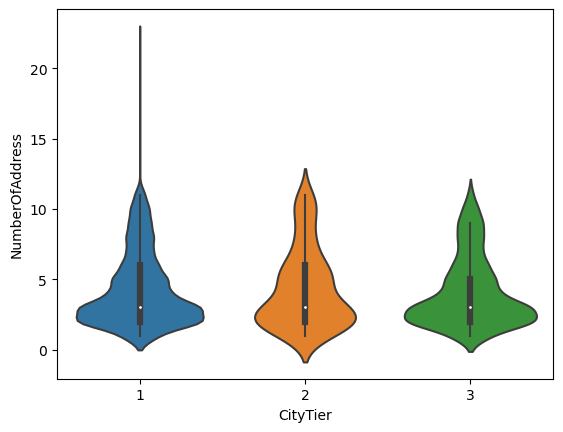

In [57]:
sns.violinplot(data=df[df["Churn"]==1],x=df["CityTier"],y=df["NumberOfAddress"])
plt.show()

### Inference:
Customers in larger cities (CityTier 1) tend to have more addresses on average compared to smaller cities and towns in lower tiers. The relationship suggests address density and type of locality (metro vs smaller cities vs towns) impacts how many addresses customers have across city types.

### 7.What is the relation between Complain and DaySinceLastOrder?

In [ ]:
import plotly.express as px

In [58]:
px.scatter(df,x="DaySinceLastOrder",y="Complain",facet_col="Churn")

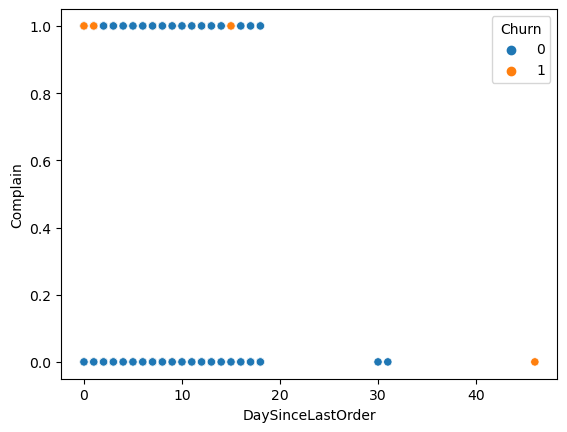

In [59]:
sns.scatterplot(data=df,x="DaySinceLastOrder",y="Complain",hue="Churn")
plt.show()

### Inference:
There is a weak negative relation between complainig and the number of dayes since last order.

### 8-Is there a relationship between PreferredLoginDevice and churn?

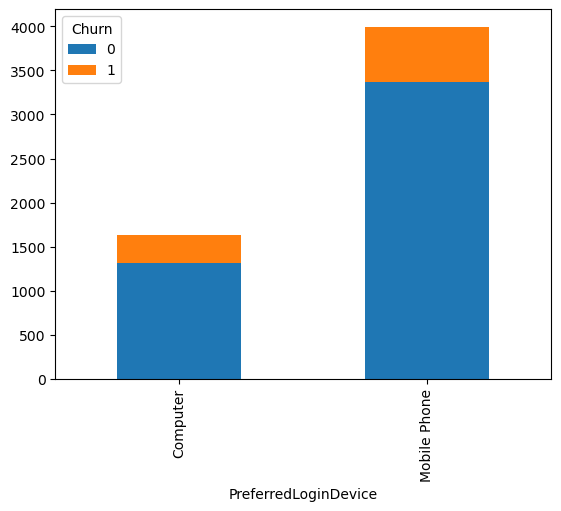

In [60]:
df.groupby(by=["PreferredLoginDevice","Churn"]).size().unstack().plot(kind="bar",stacked=True)
plt.show()

### 9-What is distancebetween warehouse to customer house in different city tier ?

In [61]:
df2=df.copy()

In [62]:
df2["CityTier"].dtype

dtype('int64')

In [63]:
# For strip plot we are converting the data type into string format.
df2["CityTier"].astype("str")

0       3
1       1
2       1
3       3
4       1
       ..
5625    1
5626    1
5627    1
5628    3
5629    1
Name: CityTier, Length: 5630, dtype: object

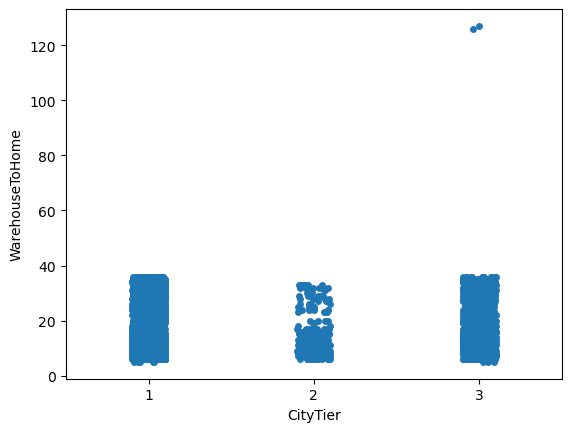

In [64]:
sns.stripplot(data=df2,x="CityTier",y="WarehouseToHome")
plt.show()

### Inference:
*  As the distance from warehouse to home is similar in all city tier which means company had build warehouse in lower city tier also.

# Data Preprocessing:

## Handling Missing Values:

In [65]:
df.isnull().sum()/len(df)*100

CustomerID                     0.000000
Churn                          0.000000
Tenure                         4.689165
PreferredLoginDevice           0.000000
CityTier                       0.000000
WarehouseToHome                4.458259
PreferredPaymentMode           0.000000
Gender                         0.000000
HourSpendOnApp                 4.529307
NumberOfDeviceRegistered       0.000000
PreferedOrderCat               0.000000
SatisfactionScore              0.000000
MaritalStatus                  0.000000
NumberOfAddress                0.000000
Complain                       0.000000
OrderAmountHikeFromlastYear    4.706927
CouponUsed                     4.547069
OrderCount                     4.582593
DaySinceLastOrder              5.452931
CashbackAmount                 0.000000
dtype: float64

* As all the null values are less than 6% so we can impute them.

### 1.Tenure:

<Axes: xlabel='Tenure', ylabel='Density'>

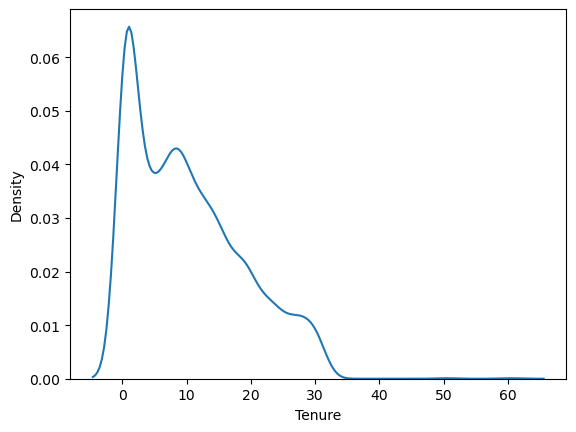

In [66]:
sns.kdeplot(df,x="Tenure")

In [67]:
# Imputing them with backward fill
df["Tenure"]=df["Tenure"].fillna(method="bfill")

In [68]:
df["Tenure"].isnull().sum()

0

### 2.Ware House To Home:

<Axes: xlabel='WarehouseToHome', ylabel='Density'>

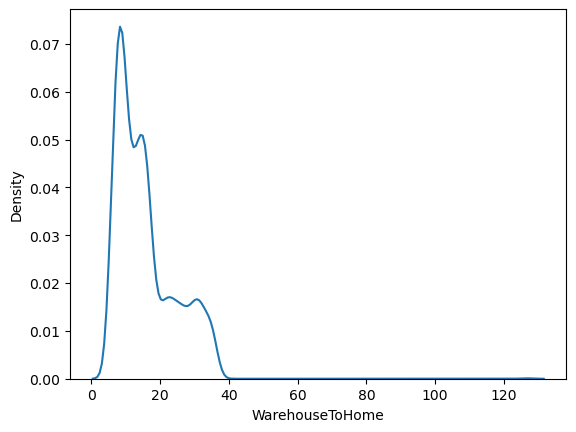

In [69]:
sns.kdeplot(df,x="WarehouseToHome")

In [70]:
df["WarehouseToHome"].dtype

dtype('float64')

In [71]:
# Imputing with Simple Imputer:
from sklearn.impute import SimpleImputer

In [72]:
simp_Im=SimpleImputer(missing_values=np.nan,strategy="most_frequent")
df["WarehouseToHome"]=simp_Im.fit_transform(pd.DataFrame(df["WarehouseToHome"]))

In [73]:
df["WarehouseToHome"].isnull().sum()

0

### 3. Hours Spend on App:

<Axes: xlabel='HourSpendOnApp', ylabel='Density'>

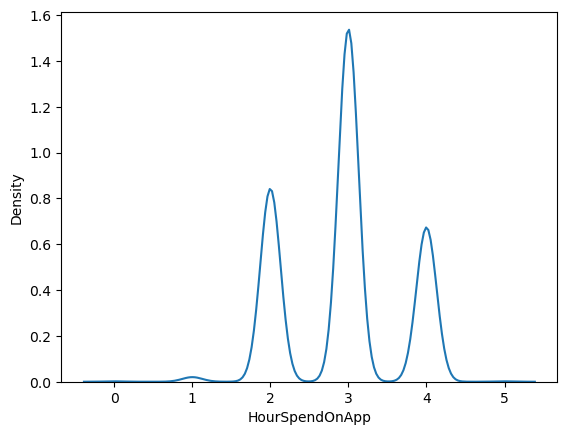

In [74]:
sns.kdeplot(df,x="HourSpendOnApp")

In [75]:
df["HourSpendOnApp"].dtype

dtype('float64')

In [76]:
simp_Im=SimpleImputer(missing_values=np.nan,strategy="median")
df["HourSpendOnApp"]=simp_Im.fit_transform(pd.DataFrame(df["HourSpendOnApp"]))

In [77]:
df["HourSpendOnApp"].isnull().sum()

0

### 4.Order Amount Hike From lastYear

<Axes: xlabel='OrderAmountHikeFromlastYear', ylabel='Density'>

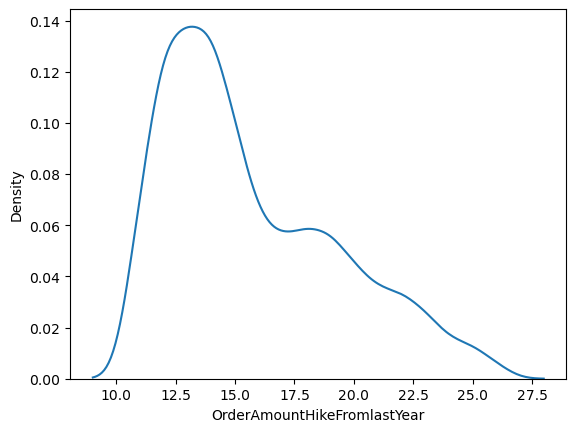

In [78]:
sns.kdeplot(df,x="OrderAmountHikeFromlastYear")

In [79]:
## Imputing with Forward fill method
df["OrderAmountHikeFromlastYear"]=df["OrderAmountHikeFromlastYear"].fillna(method="ffill")

In [80]:
df["OrderAmountHikeFromlastYear"].isnull().sum()

0

### 6. Coupouns Used:

<Axes: xlabel='CouponUsed', ylabel='Density'>

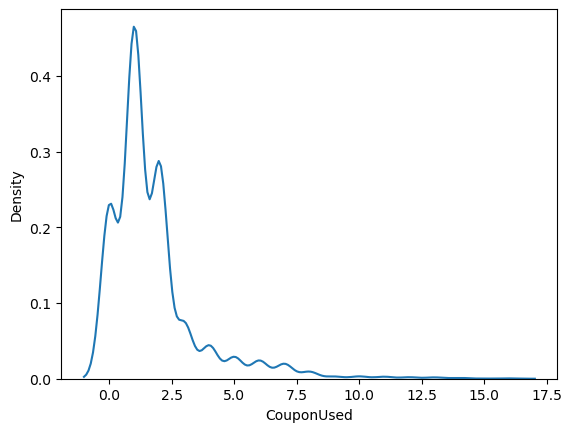

In [81]:
sns.kdeplot(df,x="CouponUsed")

In [82]:
## Imputing them with KNN Imputation:
from sklearn.impute import KNNImputer

In [83]:
imputer=KNNImputer(n_neighbors=2)
df["CouponUsed"]=imputer.fit_transform(df[["CouponUsed"]])

In [84]:
df["CouponUsed"].isnull().sum()

0

### 7. Order Count:

<Axes: xlabel='OrderCount', ylabel='Density'>

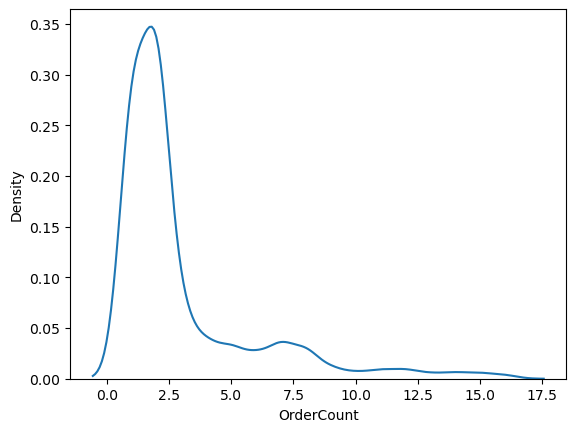

In [85]:
sns.kdeplot(df,x="OrderCount")

In [86]:
### Imputing them with KNN Imputation:
imputer_1=KNNImputer(n_neighbors=2)
df["OrderCount"]=imputer_1.fit_transform(df[["OrderCount"]])

In [87]:
df["OrderCount"].isnull().sum()

0

### 8. Day Since Last Order:

<Axes: xlabel='DaySinceLastOrder', ylabel='Density'>

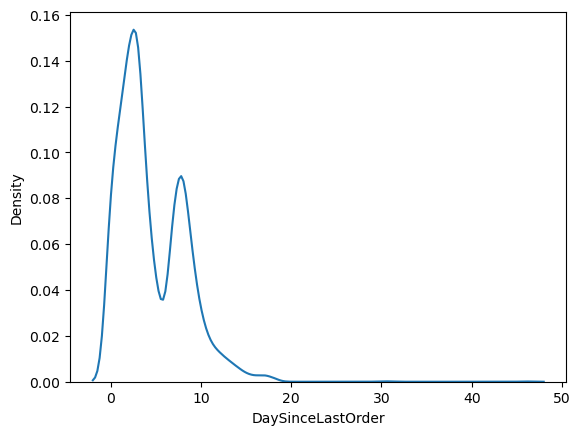

In [88]:
sns.kdeplot(df,x="DaySinceLastOrder")

In [89]:
## Imputing them with Backward fill method:
df["DaySinceLastOrder"]=df["DaySinceLastOrder"].fillna(method="bfill")

In [90]:
df["DaySinceLastOrder"].isnull().sum()

0

In [91]:
# After we Checked the data the Customer ID Column not important for our Models so We drop it
df.drop('CustomerID' , axis = 1 , inplace = True)

In [92]:
df.shape

(5630, 19)

# Encoding:

In [93]:
# Checking the categorical columns before doing encoding:
for i in df.columns:
    if df[i].dtype=="object":
        print(df[i].value_counts())
        print("*" *50)

PreferredLoginDevice
Mobile Phone    3996
Computer        1634
Name: count, dtype: int64
**************************************************
PreferredPaymentMode
Debit Card          2314
Credit Card         1774
E wallet             614
Cash on Delivery     514
UPI                  414
Name: count, dtype: int64
**************************************************
Gender
Male      3384
Female    2246
Name: count, dtype: int64
**************************************************
PreferedOrderCat
Mobile Phone          2080
Laptop & Accessory    2050
Fashion                826
Grocery                410
Others                 264
Name: count, dtype: int64
**************************************************
MaritalStatus
Married     2986
Single      1796
Divorced     848
Name: count, dtype: int64
**************************************************


In [94]:
## Getting the categorical columns:
cat_data=df[df.select_dtypes(exclude=np.number).columns]
cat_data

PreferredLoginDevice PreferredPaymentMode  Gender    PreferedOrderCat  \
0            Mobile Phone           Debit Card  Female  Laptop & Accessory   
1            Mobile Phone                  UPI    Male        Mobile Phone   
2            Mobile Phone           Debit Card    Male        Mobile Phone   
3            Mobile Phone           Debit Card    Male  Laptop & Accessory   
4            Mobile Phone          Credit Card    Male        Mobile Phone   
...                   ...                  ...     ...                 ...   
5625             Computer          Credit Card    Male  Laptop & Accessory   
5626         Mobile Phone          Credit Card    Male             Fashion   
5627         Mobile Phone           Debit Card    Male  Laptop & Accessory   
5628             Computer          Credit Card    Male  Laptop & Accessory   
5629         Mobile Phone          Credit Card    Male  Laptop & Accessory   

     MaritalStatus  
0           Single  
1           Single  
2           Single  
3           Single  
4           Single  
...            ...  
5625       Married  
5626       Married  
5627       Married  
5628       Married  
5629       Married  

[5630 rows x 5 columns]

In [95]:
## Doing Label Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [96]:
# Encoding for categorical columns:
for i in df.columns:
    if df[i].dtype=="object":
        df[i]=le.fit_transform(df[i])
df.head(4)

Churn  Tenure  PreferredLoginDevice  CityTier  WarehouseToHome  \
0      1     4.0                     1         3              6.0   
1      1     0.0                     1         1              8.0   
2      1     0.0                     1         1             30.0   
3      1     0.0                     1         3             15.0   

   PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0                     2       0             3.0                         3   
1                     4       1             3.0                         4   
2                     2       1             2.0                         4   
3                     2       1             2.0                         4   

   PreferedOrderCat  SatisfactionScore  MaritalStatus  NumberOfAddress  \
0                 2                  2              2                9   
1                 3                  3              2                7   
2                 3                  3              2                6   
3                 2                  5              2                8   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0          159.93  
1                0.0          120.90  
2                3.0          120.28  
3                3.0          134.07

In [97]:
for i in cat_data.columns:
    cat_data[i]=le.fit_transform(cat_data[i])
cat_data.head(4)

PreferredLoginDevice  PreferredPaymentMode  Gender  PreferedOrderCat  \
0                     1                     2       0                 2   
1                     1                     4       1                 3   
2                     1                     2       1                 3   
3                     1                     2       1                 2   

   MaritalStatus  
0              2  
1              2  
2              2  
3              2

# Handling Outliers:


In [98]:
df.dtypes

Churn                            int64
Tenure                         float64
PreferredLoginDevice             int32
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode             int32
Gender                           int32
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                 int32
SatisfactionScore                int64
MaritalStatus                    int32
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

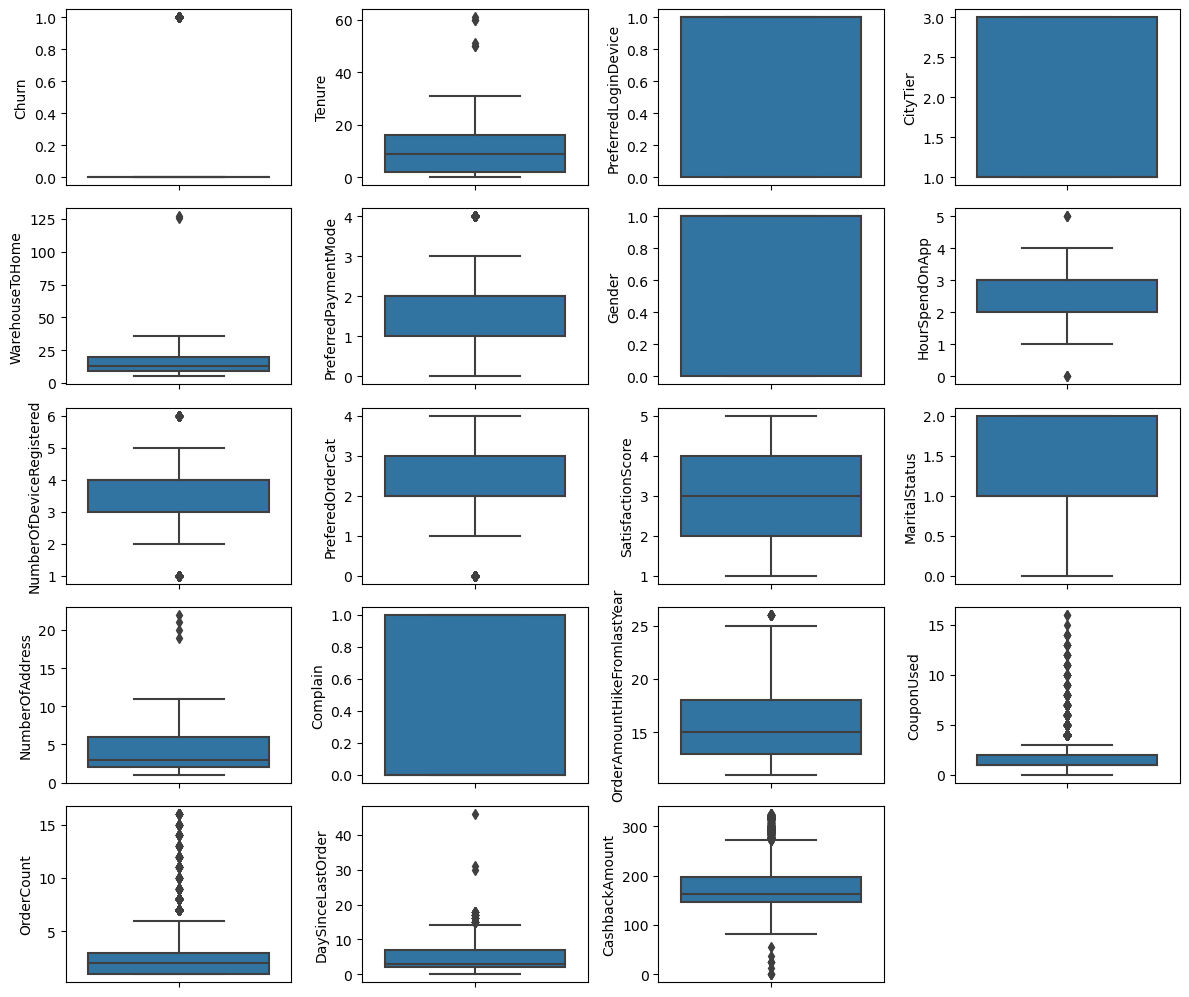

In [99]:
# Before treating the outliers:
fig=plt.figure(figsize=(12,18))
for i in range(len(df.columns)):
    fig.add_subplot(9,4,i+1)
    sns.boxplot(y=df.iloc[:,i])
plt.tight_layout()
plt.show()

In [100]:
# Lets detect the True Outliers:
def handle_outliers(df,column_name):
    q1=df[column_name].quantile(0.25)
    q3=df[column_name].quantile(0.75)
    iqr=q3-q1
    upper=q3+iqr*1.5
    lower=q1-iqr*1.5
    new_df=df[(df[column_name]>lower)&(df[column_name]<upper)]
    return new_df

In [101]:
df.columns

Index(['Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [102]:
# Applying the outlier function on those columns:
cols_outliers=["Tenure","WarehouseToHome","NumberOfAddress","DaySinceLastOrder" , "HourSpendOnApp" , "NumberOfDeviceRegistered"]

for col in cols_outliers:
    df=handle_outliers(df,col)
df.head(5)

Churn  Tenure  PreferredLoginDevice  CityTier  WarehouseToHome  \
0      1     4.0                     1         3              6.0   
1      1     0.0                     1         1              8.0   
2      1     0.0                     1         1             30.0   
3      1     0.0                     1         3             15.0   
4      1     0.0                     1         1             12.0   

   PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0                     2       0             3.0                         3   
1                     4       1             3.0                         4   
2                     2       1             2.0                         4   
3                     2       1             2.0                         4   
4                     1       1             3.0                         3   

   PreferedOrderCat  SatisfactionScore  MaritalStatus  NumberOfAddress  \
0                 2                  2              2                9   
1                 3                  3              2                7   
2                 3                  3              2                6   
3                 2                  5              2                8   
4                 3                  5              2                3   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   
4         0                         11.0         1.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0          159.93  
1                0.0          120.90  
2                3.0          120.28  
3                3.0          134.07  
4                3.0          129.60

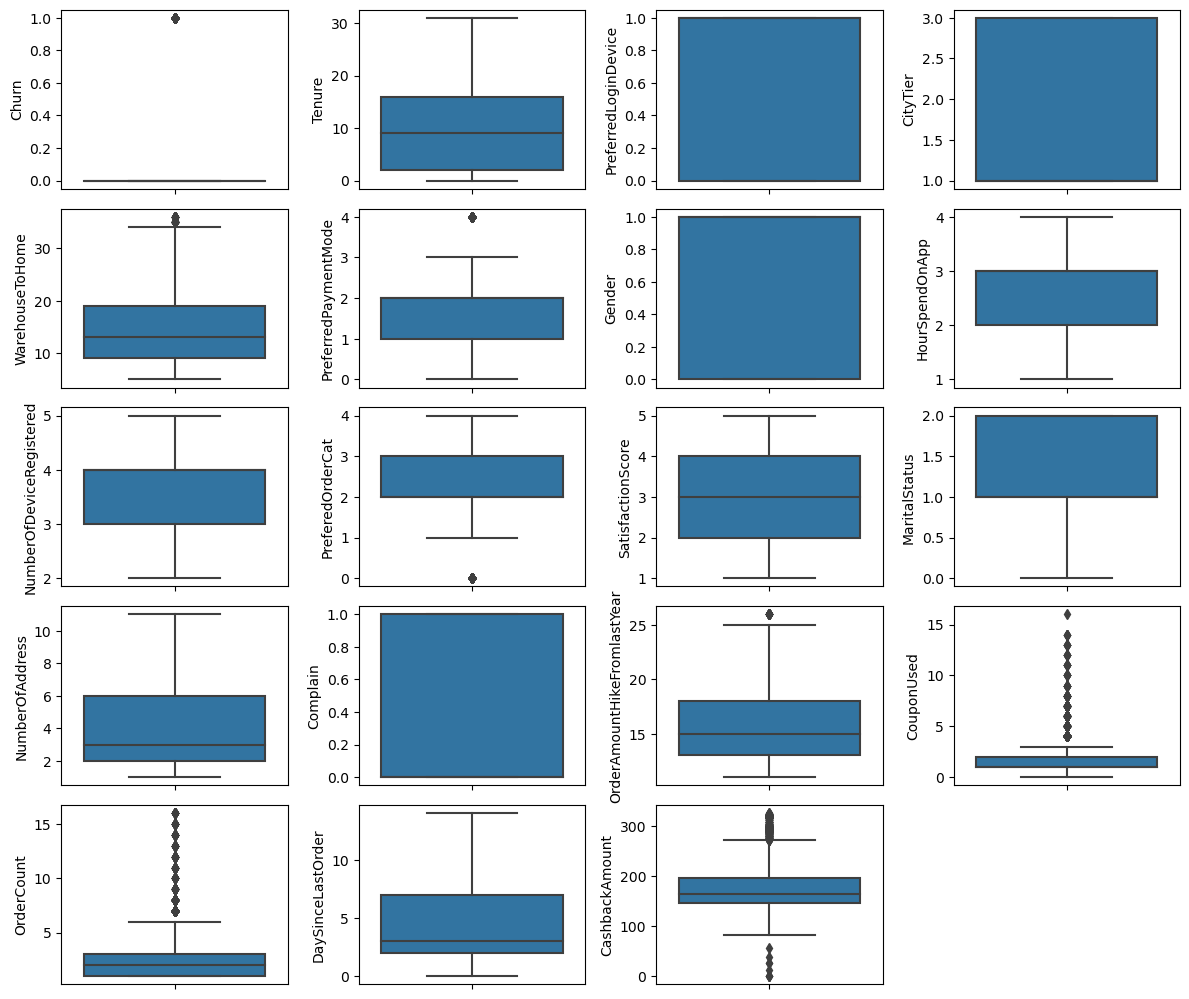

In [103]:
# After treating the outliers:
fig=plt.figure(figsize=(12,18))
for i in range(len(df.columns)):
    fig.add_subplot(9,4,i+1)
    sns.boxplot(y=df.iloc[:,i])
plt.tight_layout()
plt.show()

* We did outliers treatments only to the columns that has less outliers as because it removes the data information so we did not remove for columns that has maximum outliers.

In [104]:
corr_matrix=df.corr()
corr_matrix

Churn    Tenure  PreferredLoginDevice  \
Churn                        1.000000 -0.336058             -0.041250   
Tenure                      -0.336058  1.000000              0.034596   
PreferredLoginDevice        -0.041250  0.034596              1.000000   
CityTier                     0.069595 -0.065933              0.010097   
WarehouseToHome              0.054768 -0.011849             -0.015852   
PreferredPaymentMode        -0.005156 -0.016797              0.009610   
Gender                       0.038193 -0.054684             -0.012892   
HourSpendOnApp               0.001519 -0.012276              0.020196   
NumberOfDeviceRegistered     0.079116 -0.019592             -0.005323   
PreferedOrderCat             0.105149 -0.180637              0.005137   
SatisfactionScore            0.108600 -0.013331              0.037642   
MaritalStatus                0.131982 -0.111074             -0.020207   
NumberOfAddress              0.033703  0.240939              0.033310   
Complain                     0.252346 -0.023903              0.005983   
OrderAmountHikeFromlastYear -0.002545  0.017177             -0.005296   
CouponUsed                  -0.017914  0.127314             -0.015940   
OrderCount                  -0.036568  0.181138             -0.021975   
DaySinceLastOrder           -0.164448  0.164444             -0.027906   
CashbackAmount              -0.165008  0.453981              0.042321   

                             CityTier  WarehouseToHome  PreferredPaymentMode  \
Churn                        0.069595         0.054768             -0.005156   
Tenure                      -0.065933        -0.011849             -0.016797   
PreferredLoginDevice         0.010097        -0.015852              0.009610   
CityTier                     1.000000         0.014636              0.251539   
WarehouseToHome              0.014636         1.000000              0.008046   
PreferredPaymentMode         0.251539         0.008046              1.000000   
Gender                      -0.022759        -0.015904              0.020086   
HourSpendOnApp              -0.011062         0.082139             -0.007995   
NumberOfDeviceRegistered     0.007282         0.029049              0.012908   
PreferedOrderCat            -0.164040        -0.114357             -0.030738   
SatisfactionScore           -0.009735         0.013783             -0.018085   
MaritalStatus                0.002254        -0.028226             -0.024158   
NumberOfAddress             -0.033363         0.001173              0.003223   
Complain                     0.006312         0.022052              0.028288   
OrderAmountHikeFromlastYear -0.022135         0.028927             -0.000268   
CouponUsed                   0.017139         0.013175             -0.008582   
OrderCount                   0.035656         0.016235             -0.039249   
DaySinceLastOrder            0.023394         0.044883             -0.003581   
CashbackAmount               0.044946         0.036318              0.034381   

                               Gender  HourSpendOnApp  \
Churn                        0.038193        0.001519   
Tenure                      -0.054684       -0.012276   
PreferredLoginDevice        -0.012892        0.020196   
CityTier                    -0.022759       -0.011062   
WarehouseToHome             -0.015904        0.082139   
PreferredPaymentMode         0.020086       -0.007995   
Gender                       1.000000       -0.013842   
HourSpendOnApp              -0.013842        1.000000   
NumberOfDeviceRegistered    -0.020954        0.274546   
PreferedOrderCat             0.060969        0.031716   
SatisfactionScore           -0.037348        0.030332   
MaritalStatus               -0.019975       -0.043668   
NumberOfAddress             -0.030577        0.137051   
Complain                    -0.030350       -0.001736   
OrderAmountHikeFromlastYear -0.007694        0.103636   
CouponUsed                  -0.026477        0.184306   
O

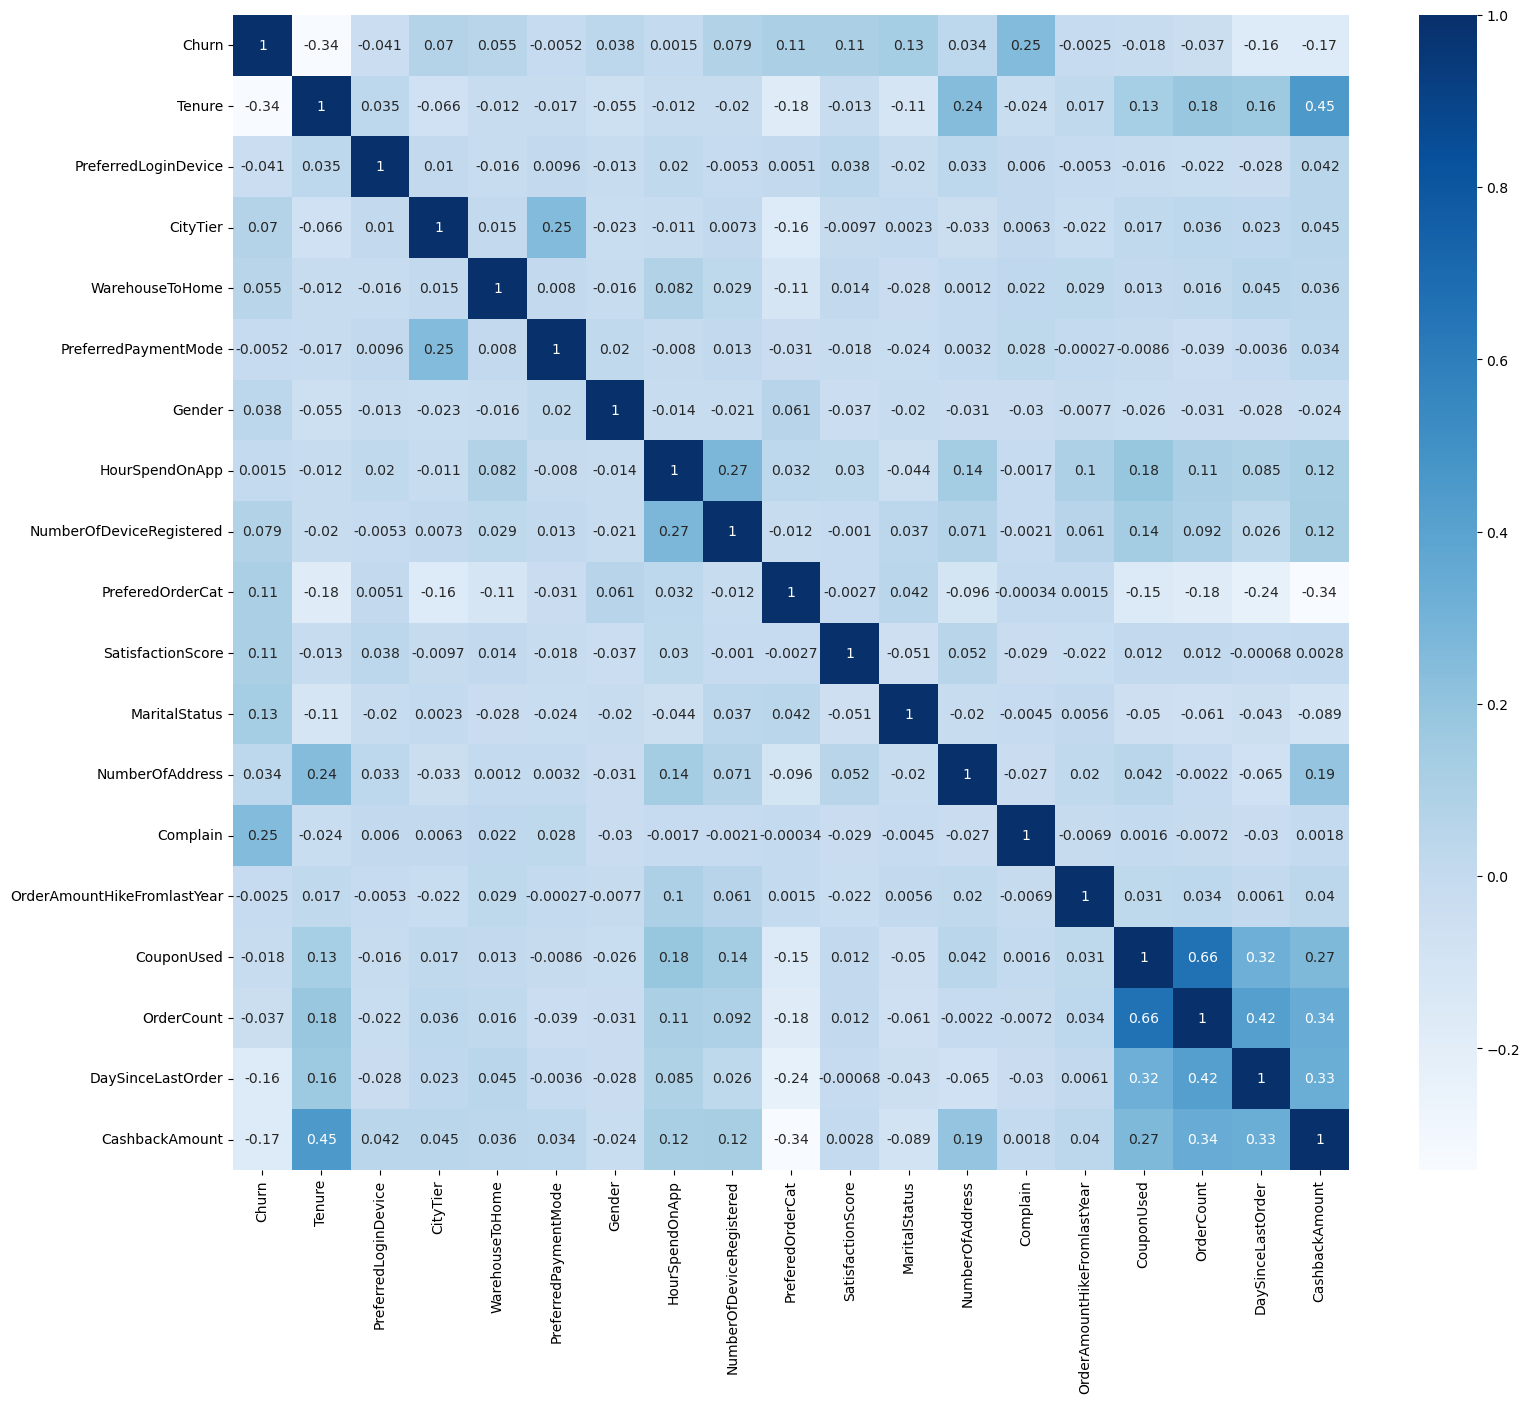

In [105]:
plt.figure(figsize=(18,15))
sns.heatmap(corr_matrix,annot=True,cmap="Blues")
plt.show()

### Checking the relation between feature and target:

In [106]:
churn_corr_vector=corr_matrix["Churn"].sort_values(ascending=False)
churn_corr_vector

Churn                          1.000000
Complain                       0.252346
MaritalStatus                  0.131982
SatisfactionScore              0.108600
PreferedOrderCat               0.105149
NumberOfDeviceRegistered       0.079116
CityTier                       0.069595
WarehouseToHome                0.054768
Gender                         0.038193
NumberOfAddress                0.033703
HourSpendOnApp                 0.001519
OrderAmountHikeFromlastYear   -0.002545
PreferredPaymentMode          -0.005156
CouponUsed                    -0.017914
OrderCount                    -0.036568
PreferredLoginDevice          -0.041250
DaySinceLastOrder             -0.164448
CashbackAmount                -0.165008
Tenure                        -0.336058
Name: Churn, dtype: float64

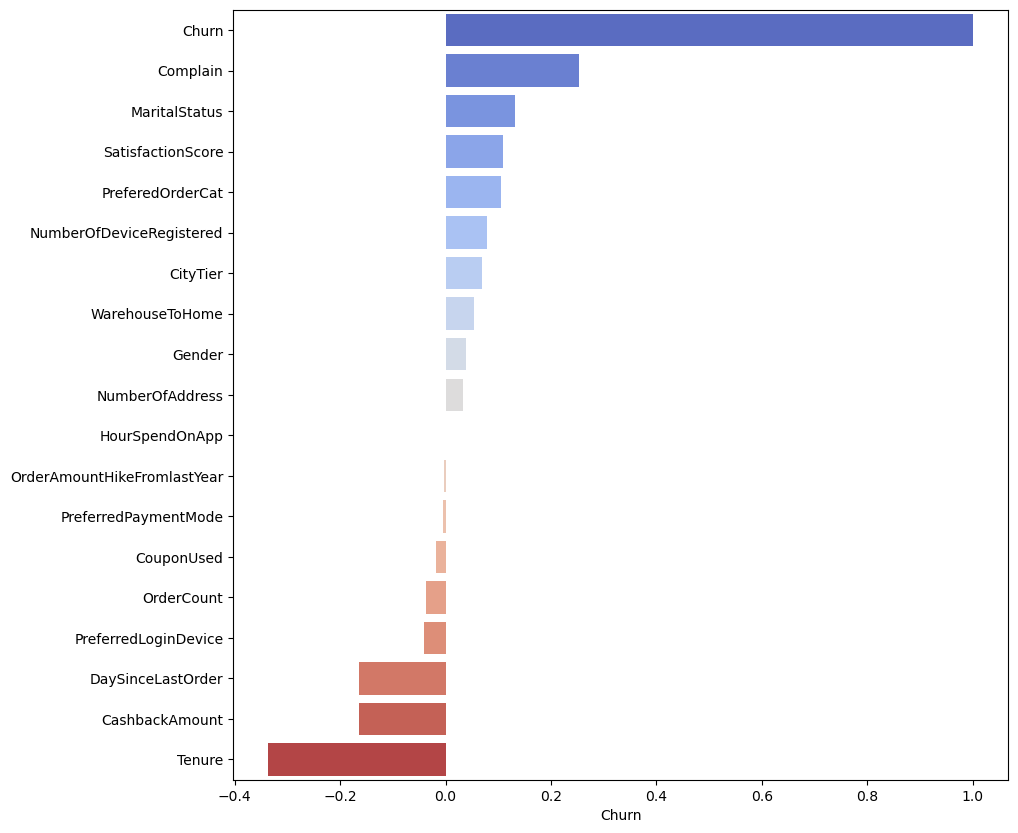

In [107]:
plt.figure(figsize=(10,10))
sns.barplot(x=churn_corr_vector,y=churn_corr_vector.index,palette="coolwarm")
plt.show()

In [108]:
 
fig=px.histogram(df2,x="Churn")
fig.show()

* From the plot we can see that, there is a huge imbalance in our data so we treat them Over Sampling mthod by using SMOTE technique.

# Handling the Imbalanced Data:

In [109]:
X=df.drop("Churn",axis=1)
Y=df["Churn"]

In [110]:
from imblearn.combine import SMOTETomek

In [111]:
smt=SMOTETomek(random_state=42)
x_over,y_over=smt.fit_resample(X,Y)

In [112]:
x_over.shape,y_over.shape

((8582, 18), (8582,))

# Splitting Data:

In [113]:
from sklearn.model_selection import train_test_split

In [114]:
x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=0.30,random_state=42)

* Now we scale the data to bring them in common range.

In [115]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [116]:
mm=MinMaxScaler()
ss=StandardScaler()

In [117]:
x_train_scaled=mm.fit_transform(x_train)
x_test_scaled=mm.fit_transform(x_test)

# Model Building:

In [118]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [119]:
log_clf=LogisticRegression()
dt_clf=DecisionTreeClassifier()
rf_clf=RandomForestClassifier()
ada_clf=AdaBoostClassifier()
xgb_clf=XGBClassifier()

In [120]:
clf_list=[log_clf,dt_clf,rf_clf,ada_clf,xgb_clf]
clf_name_list=["Logistic Regression","Decision Tree Classifier","Random Forest Classifier","AdaBoost Classifier","XGB Classifier"]

for clf in clf_list:
    clf.fit(x_train_scaled,y_train)

In [121]:
train_acc_list=[]
test_acc_list=[]

for clf,name in zip(clf_list,clf_name_list):
    y_pred_train=clf.predict(x_train_scaled)
    y_pred_test=clf.predict(x_test_scaled)
    print(f"Using Model: {name}")
    print(f"Training Score: {clf.score(x_train_scaled,y_train)}")
    print(f"Testing Score : {clf.score(x_test_scaled,y_test)}")
    print("Accuracy Score for Train:",accuracy_score(y_train,y_pred_train))
    print("Accurcy Scor for Test:",accuracy_score(y_test,y_pred_test))
    train_acc_list.append(accuracy_score(y_train,y_pred_train))
    test_acc_list.append(accuracy_score(y_test,y_pred_test))
    print(' ' * 60)
    print('*' * 60)
    print(' ' * 60)

Using Model: Logistic Regression
Training Score: 0.7682703512568669
Testing Score : 0.7732038834951457
Accuracy Score for Train: 0.7682703512568669
Accurcy Scor for Test: 0.7732038834951457
                                                            
************************************************************
                                                            
Using Model: Decision Tree Classifier
Training Score: 1.0
Testing Score : 0.9328155339805825
Accuracy Score for Train: 1.0
Accurcy Scor for Test: 0.9328155339805825
                                                            
************************************************************
                                                            
Using Model: Random Forest Classifier
Training Score: 1.0
Testing Score : 0.9689320388349515
Accuracy Score for Train: 1.0
Accurcy Scor for Test: 0.9689320388349515
                                                            
*****************************************************

In [122]:
# Putting in a dataframe to determine two best models
Models=pd.DataFrame({"Train Accuracy":train_acc_list,"Test Accuracy":test_acc_list},index=clf_name_list)
Models

Train Accuracy  Test Accuracy
Logistic Regression              0.76827       0.773204
Decision Tree Classifier         1.00000       0.932816
Random Forest Classifier         1.00000       0.968932
AdaBoost Classifier              0.87448       0.842330
XGB Classifier                   1.00000       0.961942

* Plotting a barplot to determine the Training and Testing scores against the perfomence of the model

In [123]:
# Models Vs Training Accuracies:
fig=px.bar(Models,x=Models["Train Accuracy"],y=Models.index,color=Models['Train Accuracy'],title="<b>"+'Models Vs Train Accuracies',text_auto= True , color_continuous_scale='Reds')
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='Train Accuracy',
yaxis_title='Models Names',
)
fig.show()

In [124]:
# Models Vs Testing Accuracies:
fig=px.bar(Models,x=Models["Test Accuracy"],y=Models.index,color=Models['Test Accuracy'],title="<b>"+'Models Vs Test Accuracies',text_auto= True , color_continuous_scale='blues')
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='Train Accuracy',
yaxis_title='Models Names',
)
fig.show()

* From the Plots we can say that Random Forest and XGBoost are giving best models.

# Evaluating the Models the we built:

In [125]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score,roc_auc_score,classification_report,confusion_matrix,RocCurveDisplay

### 1. Logistic Regression:

Accuracy=0.7732038834951457
ROC Area Under Curve =0.7728618615574365
              precision    recall  f1-score   support

           0       0.78      0.75      0.77      1267
           1       0.77      0.79      0.78      1308

    accuracy                           0.77      2575
   macro avg       0.77      0.77      0.77      2575
weighted avg       0.77      0.77      0.77      2575

**********************************************************************


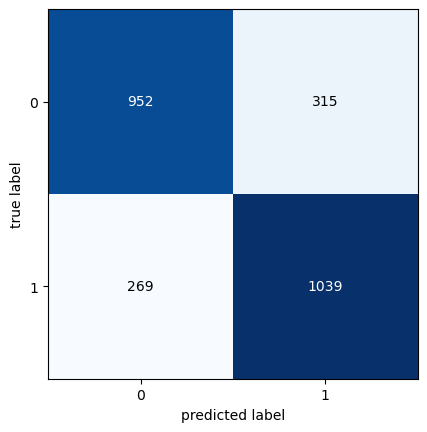

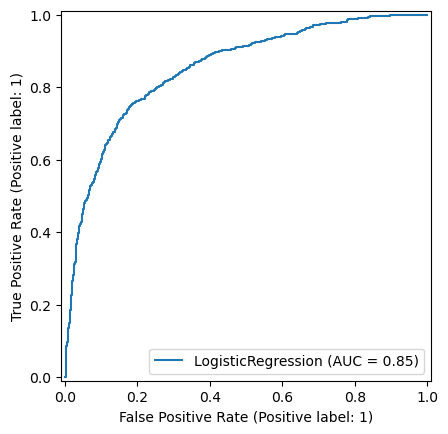

In [126]:
model=LogisticRegression()
model.fit(x_train_scaled,y_train)
y_pred=model.predict(x_test_scaled)
accuracy=accuracy_score(y_test,y_pred)
roc_auc_1=roc_auc_score(y_test,y_pred)
print("Accuracy={}".format(accuracy))
print("ROC Area Under Curve ={}".format(roc_auc_1))
print(classification_report(y_test,y_pred))
plot_confusion_matrix(confusion_matrix(y_test,y_pred))
print("*" * 70)
RocCurveDisplay.from_estimator(model,x_test_scaled,y_test)

### 2. Decision Tree:

Accuracy=0.9394174757281554
ROC Area Under Curve=0.939228932994456
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1267
           1       0.93      0.95      0.94      1308

    accuracy                           0.94      2575
   macro avg       0.94      0.94      0.94      2575
weighted avg       0.94      0.94      0.94      2575

**********************************************************************


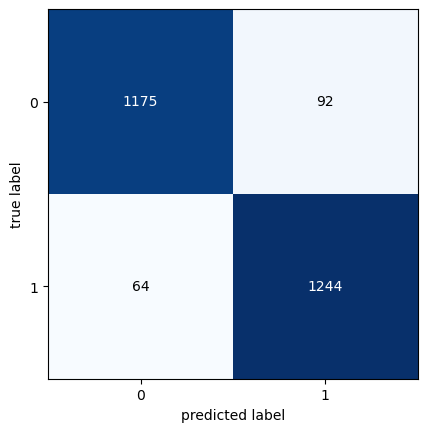

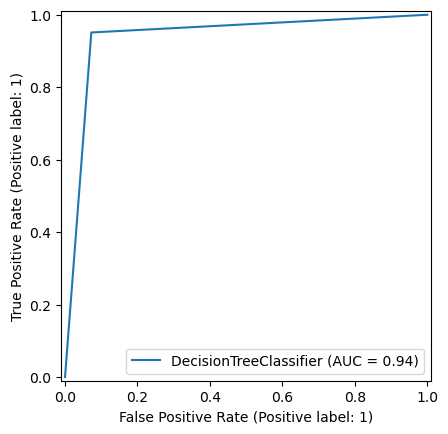

In [127]:
model=DecisionTreeClassifier()
model.fit(x_train_scaled,y_train)
y_pred=model.predict(x_test_scaled)
accuracy=accuracy_score(y_test,y_pred)
roc_auc_2=roc_auc_score(y_test,y_pred)
print("Accuracy={}".format(accuracy))
print("ROC Area Under Curve={}".format(roc_auc_2))
print(classification_report(y_test,y_pred))
plot_confusion_matrix(confusion_matrix(y_test,y_pred))
print("*"*70)
RocCurveDisplay.from_estimator(model,x_test_scaled,y_test)

### 3. Random Forest:

Accuracy=0.9669902912621359
ROC Area Under Curve=0.9667407056086159
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      1267
           1       0.95      0.98      0.97      1308

    accuracy                           0.97      2575
   macro avg       0.97      0.97      0.97      2575
weighted avg       0.97      0.97      0.97      2575

**********************************************************************


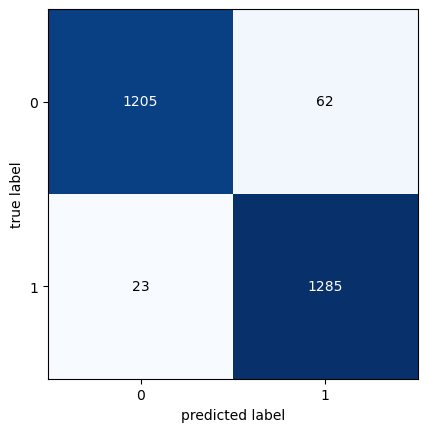

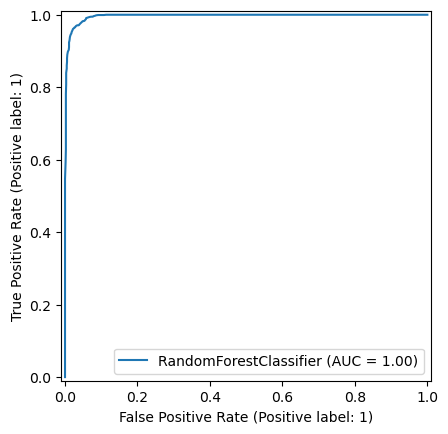

In [128]:
model=RandomForestClassifier()
model.fit(x_train_scaled,y_train)
y_pred=model.predict(x_test_scaled)
accuracy=accuracy_score(y_test,y_pred)
roc_auc_3=roc_auc_score(y_test,y_pred)
print("Accuracy={}".format(accuracy))
print("ROC Area Under Curve={}".format(roc_auc_3))
print(classification_report(y_test,y_pred))
plot_confusion_matrix(confusion_matrix(y_test,y_pred))
print("*"*70)
RocCurveDisplay.from_estimator(model,x_test_scaled,y_test)

### 4. XGBoost Classifier:

Accuracy=0.9619417475728156
ROC Area Under Curve=0.9614001868170858
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      1267
           1       0.93      1.00      0.96      1308

    accuracy                           0.96      2575
   macro avg       0.96      0.96      0.96      2575
weighted avg       0.96      0.96      0.96      2575

**********************************************************************


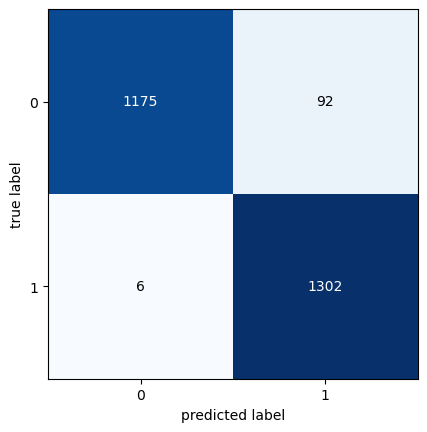

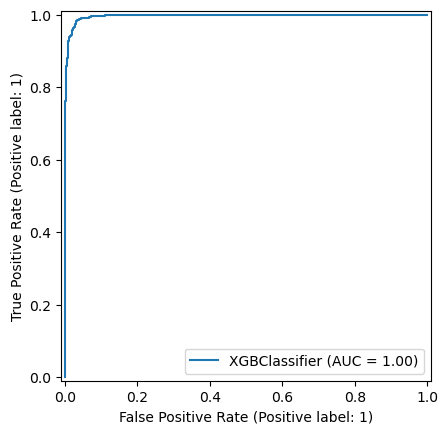

In [129]:
model=XGBClassifier()
model.fit(x_train_scaled,y_train)
y_pred=model.predict(x_test_scaled)
accuracy=accuracy_score(y_test,y_pred)
roc_auc_4=roc_auc_score(y_test,y_pred)
print("Accuracy={}".format(accuracy))
print("ROC Area Under Curve={}".format(roc_auc_4))
print(classification_report(y_test,y_pred))
plot_confusion_matrix(confusion_matrix(y_test,y_pred))
print("*"*70)
RocCurveDisplay.from_estimator(model,x_test_scaled,y_test)

### 5. AdaBoost Classifier:

Accuracy score=0.8423300970873786
ROC Area Under Curve=0.8412139248724986
              precision    recall  f1-score   support

           0       0.89      0.77      0.83      1267
           1       0.80      0.91      0.85      1308

    accuracy                           0.84      2575
   macro avg       0.85      0.84      0.84      2575
weighted avg       0.85      0.84      0.84      2575



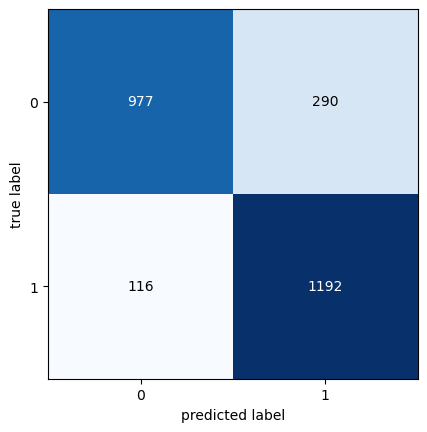

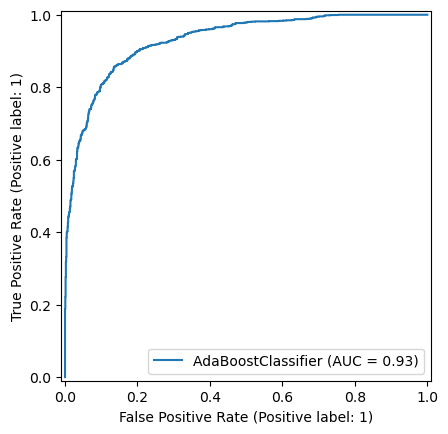

In [130]:
model=AdaBoostClassifier()
model.fit(x_train_scaled,y_train)
y_pred=model.predict(x_test_scaled)
accuracy=accuracy_score(y_test,y_pred)
roc_auc_5=roc_auc_score(y_test,y_pred)
print("Accuracy score={}".format(accuracy))
print("ROC Area Under Curve={}".format(roc_auc_5))
print(classification_report(y_test,y_pred))
plot_confusion_matrix(confusion_matrix(y_test,y_pred))
RocCurveDisplay.from_estimator(model,x_test_scaled,y_test)

# Automated ML:

In [ ]:
!pip install pycaret

In [ ]:
from pycaret.classification import *

In [ ]:
# Setting up the model: